In [2]:
import re
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib import style, colors
from matplotlib import gridspec
import random
import string
import math


from adjustText import adjust_text

# matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. plot q value of mutsig2cv SMGs

In [5]:
# constants
wkdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/'

In [63]:
f = f'{wkdir}118_patients/sig_genes.txt'
df = pd.read_csv(f, sep='\t')
df.head(2)
df.shape

df = df[['gene', 'rank', 'q']].set_index('gene')
df['logq'] = -np.log10(df['q'])
df.head(2)

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
0,1,PIK3CA,"phosphoinositide-3-kinase, catalytic, alpha po...",3289,4,65,1,47,0,0,0,47,41,13,1.000000e-16,0.000010,0.00004,1.000000e-16,1.886200e-12
1,2,RBMXL1,"RNA binding motif protein, X-linked-like 1",1275,1,0,2,5,1,0,0,6,5,3,5.158761e-06,0.000375,1.00000,5.613576e-08,5.294163e-04


(18862, 19)

,rank,q,logq
gene,,,
PIK3CA,1,1.886200e-12,11.724412
RBMXL1,2,5.294163e-04,3.276203


plot the first 50 genes

In [11]:
df.plot()

Object `df.scatter` not found.


Text(0, 0.5, 'q value')

143

CPU times: user 1 s, sys: 44 ms, total: 1.05 s
Wall time: 1.05 s


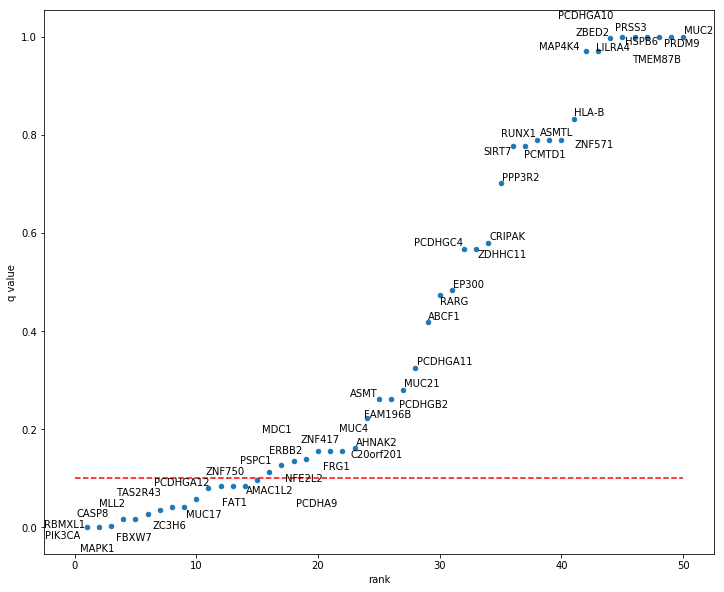

In [16]:
df = df.head(50)
df.plot('rank', 'q', kind='scatter',figsize=(12,10))
plt.hlines(0.1, 0, 50, colors='r', linestyles='dashed')
plt.ylabel('q value')
texts = [plt.text(a, b, c) for a, b, c in zip(df['rank'], df['q'], df.index)]
adjust_text(texts)
of = f'{wkdir}smgs_118_patients.png'
%time plt.savefig(of, bbox_inches='tight',dpi=200)
plt.show()


# 2. HIV+ vs HIV- SMGs

In [8]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/HIV_neg/sig_genes.txt'
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/HIV_pos/sig_genes.txt'

In [9]:
df1 = pd.read_csv(f1, sep='\t')
df1.head(2)
df1.shape

df1 = df1[['gene', 'rank', 'q']].set_index('gene')
df1.head(2)

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
0,1,PIK3CA,"phosphoinositide-3-kinase, catalytic, alpha po...",3289,1,42,0,24,0,0,0,24,20,8,2.486592e-13,0.00001,0.00105,1.110223e-16,2.094103e-12
1,2,FBXW7,F-box and WD repeat domain containing 7,2580,2,51,0,5,0,0,1,6,6,6,1.493536e-04,1.00000,0.03500,1.026523e-04,9.681136e-01


(18862, 19)

,rank,q
gene,,
PIK3CA,1,2.094103e-12
FBXW7,2,9.681136e-01


In [10]:
df2 = pd.read_csv(f2, sep='\t')
df2.head(2)
df2.shape

df2 = df2[['gene', 'rank', 'q']].set_index('gene')
df2.head(2)

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
0,1,PIK3CA,"phosphoinositide-3-kinase, catalytic, alpha po...",3289,1,23,1,23,0,0,0,23,21,11,1.033533e-15,0.00001,0.00526,1.000000e-16,1.886200e-12
1,2,FRG1,FSHD region gene 1,812,0,182,3,19,0,4,0,23,12,10,4.619031e-02,0.00025,0.01117,7.200104e-06,6.790418e-02


(18862, 19)

,rank,q
gene,,
PIK3CA,1,1.886200e-12
FRG1,2,6.790418e-02


In [11]:
dfm = pd.merge(df1, df2, left_index=True, right_index=True)
dfm.head(2)

,rank_x,q_x,rank_y,q_y
gene,,,,
PIK3CA,1,2.094103e-12,1,1.886200e-12
FBXW7,2,9.681136e-01,39,1.000000e+00


In [12]:
dfm = dfm[(dfm.q_x<.3)|(dfm.q_y <.3)]

In [13]:
dfm

,rank_x,q_x,rank_y,q_y
gene,,,,
PIK3CA,1,2.094103e-12,1,1.886200e-12
ASMT,23,1.000000e+00,8,2.437496e-01
PCDHGA12,64,1.000000e+00,15,2.889585e-01
NHEDC1,99,1.000000e+00,6,1.090002e-01
ZC3H6,115,1.000000e+00,9,2.870623e-01
CASP8,119,1.000000e+00,3,8.167211e-02
MAPK1,180,1.000000e+00,5,1.090002e-01
MUC17,421,1.000000e+00,4,1.087731e-01
SIRT7,460,1.000000e+00,13,2.870623e-01


96

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 320 ms


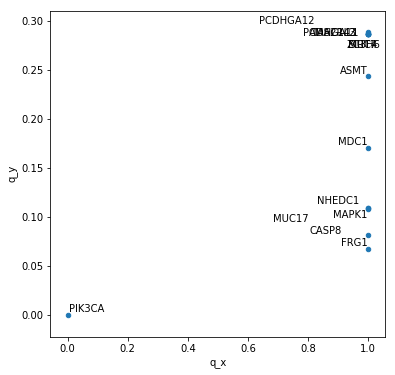

In [17]:
# plt.scatter(dfm.q_x, dfm.q_y)
dfm.plot('q_x', 'q_y', kind='scatter',figsize=(6,6))
texts = [plt.text(a, b, gene) for a, b, gene in zip(dfm.q_x, dfm.q_y, dfm.index)]
adjust_text(texts)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/smgs_hiv_pos_vs_neg.png'

%time plt.savefig(of, bbox_inches='tight',dpi=200)
plt.show()

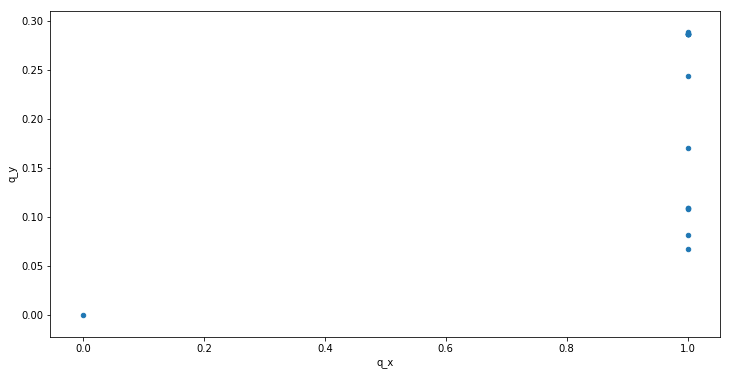

In [29]:
dfm.plot('q_x', 'q_y', kind='scatter')

# 3. frequency of mutated genes

In [18]:
mutdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/'

In [64]:
f3 = f'{mutdir}HIGH_MODERATE_SNV_summary_with_normal_with_AF_filtered_somatic.tsv'
df3 = pd.read_csv(f3, sep='\t', low_memory=False)
df3.shape
df3.head(2)

(44053, 40)

,gene,chromosome,position,ref_base,alt_base,patient_ID,snp_ID,gmaf,cosmic64_ID,snpeff_details,...,t_RNA_RefC,t_RNA_AltC,t_RNA_AF,RNA_tc,Quality_filter,adj_t_Quality_filter,Somatic_filter,filtered_somatic_num_patients_gene_level,filtered_somatic_num_SNVs_gene_level,filtered_somatic_num_patients_SNV_level
0,SAMD11,1,865615,C,A,HTMCP-03-06-02007,novel_snp,gmaf_unknown,not_in_cosmic64,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|ttC/tt...,...,15,9,0.38,50.0,True,True,True,2,2,1
1,SAMD11,1,878183,C,T,HTMCP-03-06-02214,novel_snp,gmaf_unknown,not_in_cosmic64,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Ccc/Tc...,...,0,1,1.00,90.0,True,True,True,2,2,1


In [65]:
f4 = f'{mutdir}118_tumor_normal_pairs.txt'
df4 = pd.read_csv(f4, sep='\t', header=None)
df4.columns = ['patient', 'lib', 'status', 'bams']
df4.head(2)

,patient,lib,status,bams
0,HTMCP-03-06-02001,A37234,Malignant,/projects/analysis/analysis22/A37234/merge_bwa...
1,HTMCP-03-06-02001,A37159,normal,/projects/analysis/analysis22/A37159/merge_bwa...


In [66]:
patients = df4.patient.unique().tolist()
len(patients)
patients[:2]

118

['HTMCP-03-06-02001', 'HTMCP-03-06-02002']

In [67]:
df118 = df3[df3.patient_ID.isin(patients)]
assert df118.patient_ID.nunique() == 118
df118.shape

(22376, 40)

In [68]:
df118.head(2)
# only care about strelka calls for now
df118_strelka = df118[df118.in_strelka == 'in_strelka']
df118_strelka.shape

,gene,chromosome,position,ref_base,alt_base,patient_ID,snp_ID,gmaf,cosmic64_ID,snpeff_details,...,t_RNA_RefC,t_RNA_AltC,t_RNA_AF,RNA_tc,Quality_filter,adj_t_Quality_filter,Somatic_filter,filtered_somatic_num_patients_gene_level,filtered_somatic_num_SNVs_gene_level,filtered_somatic_num_patients_SNV_level
1,SAMD11,1,878183,C,T,HTMCP-03-06-02214,novel_snp,gmaf_unknown,not_in_cosmic64,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Ccc/Tc...,...,0,1,1.00,90.0,True,True,True,2,2,1
2,KLHL17,1,899543,G,C,HTMCP-03-06-02120,novel_snp,gmaf_unknown,not_in_cosmic64,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Gag/Ca...,...,2,1,0.33,70.0,True,True,True,1,1,1


(19368, 40)

In [69]:
df_freq = pd.DataFrame(df118_strelka[['gene', 'patient_ID']].groupby('gene')['patient_ID'].nunique())


In [70]:
df_freq.head(2)

,patient_ID
gene,
A1BG,1
A1CF,2


In [71]:
df_freq['fraction_patients'] = df_freq.patient_ID/118.0*100

In [72]:
of =f'{mutdir}strelka_mutation_frequency.txt'
df_freq.to_csv(of, sep='\t')

In [73]:
df.head()

,rank,q,logq
gene,,,
PIK3CA,1,1.886200e-12,11.724412
RBMXL1,2,5.294163e-04,3.276203
MAPK1,3,1.443946e-03,2.840449
CASP8,4,1.592191e-02,1.798005
FBXW7,5,1.593530e-02,1.797640


In [78]:
df.rename(index={'AMAC1L2':'SLC35G5'}, inplace=True)

In [80]:
# df.loc['AMAC1L2',]
df.loc['SLC35G5',]

rank    13.000000
q        0.083744
logq     1.077046
Name: SLC35G5, dtype: float64

In [82]:
# df_freq = df_freq.reindex(df.index)

In [97]:
dfm = pd.merge(df, df_freq, left_index=True, right_index=True)
dfm.head(3)
dfm.shape

,rank,q,logq,patient_ID,fraction_patients
gene,,,,,
PIK3CA,1,1.886200e-12,11.724412,41.0,34.745763
RBMXL1,2,5.294163e-04,3.276203,2.0,1.694915
MAPK1,3,1.443946e-03,2.840449,6.0,5.084746


(18862, 5)

In [115]:
dfm.head(50)

,rank,q,logq,patient_ID,fraction_patients
gene,,,,,
PIK3CA,1,1.886200e-12,11.724412,41.0,34.745763
RBMXL1,2,5.294163e-04,3.276203,2.0,1.694915
MAPK1,3,1.443946e-03,2.840449,6.0,5.084746
CASP8,4,1.592191e-02,1.798005,5.0,4.237288
FBXW7,5,1.593530e-02,1.797640,10.0,8.474576
KMT2D,6,2.766036e-02,1.558142,11.0,9.322034
ZC3H6,7,3.467112e-02,1.460032,3.0,2.542373
TAS2R43,8,4.054229e-02,1.392092,5.0,4.237288
MUC17,9,4.054229e-02,1.392092,17.0,14.406780


In [ ]:
dfm.plot.scatter()

In [103]:
from plotnine import *


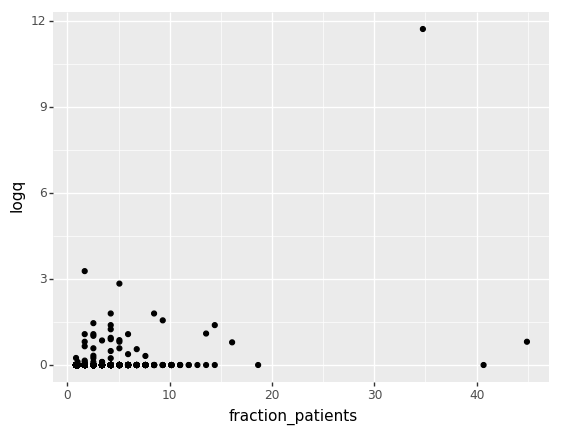

<ggplot: (8730740187803)>

In [104]:
(ggplot(dfm, aes('fraction_patients', 'logq'))
 + geom_point())

Text(0, 0.5, '-log10(q)')

83

CPU times: user 891 ms, sys: 10 ms, total: 901 ms
Wall time: 909 ms


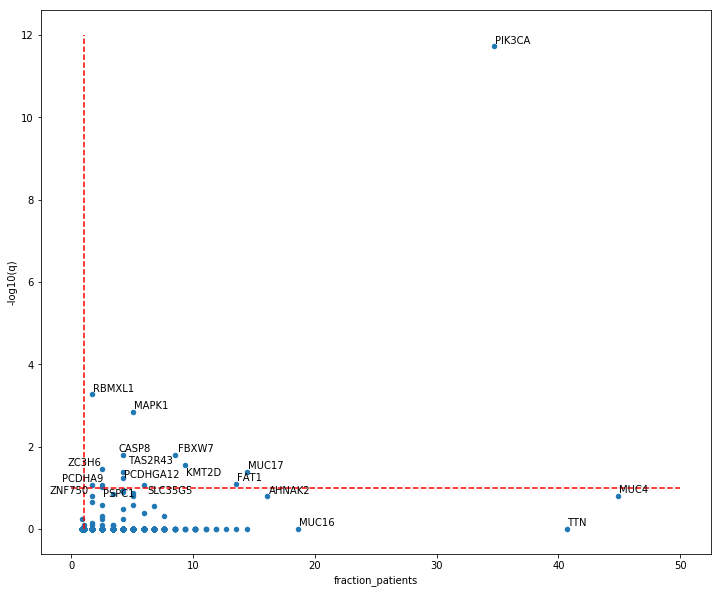

In [116]:
dfm=dfm.fillna(1)
dfm.rename(index={'MLL2':'KMT2D'}, inplace=True)
dfm.plot.scatter('fraction_patients', 'logq', figsize=(12,10))
plt.hlines(1, 0, 50, colors='r', linestyles='dashed')
plt.vlines(1, 0, 12, colors='r', linestyles='dashed')
plt.ylabel('-log10(q)', fontsize=10)
dfn = dfm[(dfm['logq'] >= 1)|(dfm.fraction_patients > 15)]
texts = [plt.text(a, b, c) for a, b, c in zip(dfn['fraction_patients'], dfn['logq'], dfn.index)]
adjust_text(texts)
of = f'{wkdir}smgs_118_patients.png'
%time plt.savefig(of, bbox_inches='tight',dpi=200)
plt.show()


In [ ]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/genes_highlighted_in_gcga_landscape_paper_xytext.txt'
df22 = pd.read_csv(f, sep='\t')
# df22.columns = ['gene', 'bb','tcga_freq', 'cc','htmcp_freq', 'htmcp_minus_tcga', 'xtext', 'ytext']
df22.head(2)

df22 = df22.sort_values(['tcga_freq', 'htmcp_freq'], ascending=False)

,gene,bb,tcga_freq,cc,htmcp_freq,htmcp_minus_tcga,xtext,ytext
0,EP300,21.0,0.108247,10.0,0.081301,-0.026947,0.34,0.28
1,PTEN,16.0,0.082474,7.0,0.056911,-0.025564,0.32,0.19


(0, 0.4)

(0, 0.4)

Text(0.5,0,'Mutation frequency in TCGA')

Text(0,0.5,'Mutation frequency in HTMCP')

CPU times: user 519 ms, sys: 13.5 s, total: 14 s
Wall time: 25.7 s


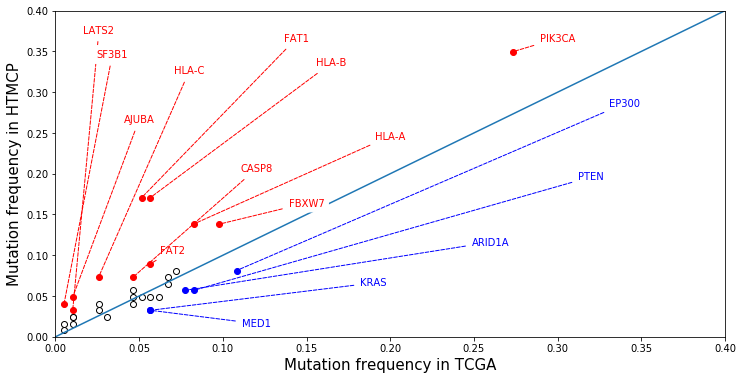

In [3]:
i = 0
a = 0
# genes = []
for ix, row in df22.iterrows():
    x = row.tcga_freq
    y = row.htmcp_freq
    t = row.gene
    d = row.htmcp_minus_tcga
    xtext = row.xtext
    ytext = row.ytext
    gene = row.gene
#     print(x, y)
 
    if x < y and d > 0.02:
        _ = plt.scatter(x,y,c='red')
        anno_color = 'red'
        anno_ecolor='white'
        fill_color = 'white'
        _ = plt.annotate('{}'.format(t),
                xy=(x,y), 
                xytext=(xtext, ytext), fontsize=10,
                ha='center', va='bottom', color=anno_color,
                textcoords='data', xycoords="data", 
                bbox=dict(boxstyle='round', 
                          fc=fill_color, 
                          edgecolor=anno_ecolor,
                          alpha=1, pad=.4),
                arrowprops=dict(arrowstyle='-', ls='dashed',
                                color=anno_color,
                                shrinkB=0, 
                                connectionstyle='arc3,rad=0.0' 
                              ))
#         i+=.01
#         genes.append([gene, '{0:.3f}'.format(x), '{0:.3f}'.format(y+i)])
        
    elif x >= y and d < -0.02:
        _ = plt.scatter(x,y,c='blue')
        anno_color = 'blue'
        anno_ecolor='white'
        fill_color = 'white'
        _ = plt.annotate('{}'.format(t),
                xy=(x,y), 
                xytext=(xtext, ytext), fontsize=10,
                ha='center', va='bottom', color=anno_color,
                textcoords='data', xycoords="data", 
                bbox=dict(boxstyle='round', 
                          fc=fill_color, 
                          edgecolor=anno_ecolor,
                          alpha=1, pad=.4),
                arrowprops=dict(arrowstyle='-', ls='dashed',
                                color=anno_color,
                                shrinkB=0, 
                                connectionstyle='arc3,rad=0.0' 
                              ))
    elif d <= 0.02 and d >= -0.02:
        _ = plt.scatter(x,y, facecolor='white', edgecolor='black')
#         a+=.01
#         genes.append([gene, '{0:.3f}'.format(x+3*a), '{0:.3f}'.format(y)])
# plt.scatter(df22['tcga_freq'], df22['htmcp_freq'])
plt.plot((0,.4), (0,.4))
plt.xlim(0, .4)
plt.ylim(0,.4)
plt.xlabel('Mutation frequency in TCGA', fontsize=15)
plt.ylabel('Mutation frequency in HTMCP', fontsize=15)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutation_frequency_comparison_htmcp_tcga_highlighted_genes_only.png'

%time plt.savefig(of, bbox_inches='tight',dpi=200)
plt.show()